# Import all the needed library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels as sts

# Brief description of the data set and a summary of its attributes
I will be using the Wine Quality dataset from UCI ML repo.Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal.

In [ ]:
!pip install ucimlrepo

Lets Explore the data, Lets look at the features and the targets.



In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
x = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

There are no missing data. This will make cleanup easy.

Check out the scale on the quality index

In [ ]:
print(y['quality'].max())

9


Lets check out the features

In [ ]:
print(x)

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  

Lets checkout how the data is distributed.

In [ ]:
print(x.describe())

       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

Check out individual Colums

Lets look at how alcohol is ditributed

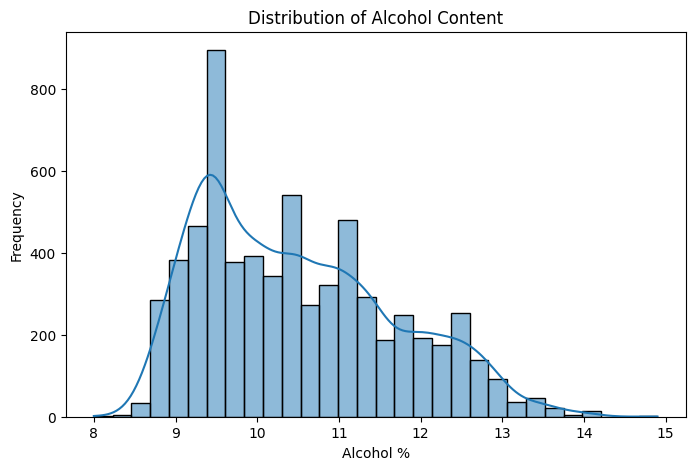

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(x["alcohol"], bins=30, kde=True)
plt.title("Distribution of Alcohol Content")
plt.xlabel("Alcohol %")
plt.ylabel("Frequency")
plt.show()

Little skewed

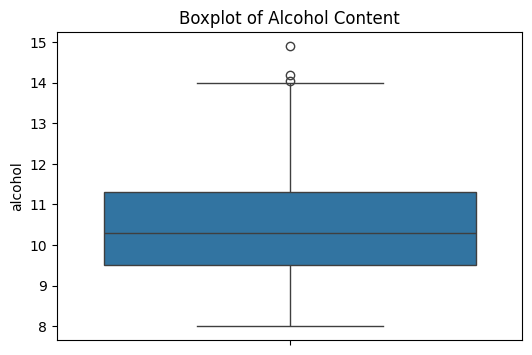

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x["alcohol"])
plt.title("Boxplot of Alcohol Content")
plt.show()

Some outlier
Lets explore it further

In [ ]:
Q1 = x["alcohol"].quantile(0.25)  # 25th percentile
Q3 = x["alcohol"].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = x[(x["alcohol"] < lower_bound) | (x["alcohol"] > upper_bound)]
print(outliers)

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
652            15.9              0.36         0.65             7.5      0.096   
5517            6.4              0.35         0.28             1.6      0.037   
6102            5.8              0.61         0.01             8.4      0.041   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
652                  22.0                  71.0  0.99760  2.98       0.84   
5517                 31.0                 113.0  0.98779  3.12       0.40   
6102                 31.0                 104.0  0.99090  3.26       0.72   

      alcohol  
652     14.90  
5517    14.20  
6102    14.05  


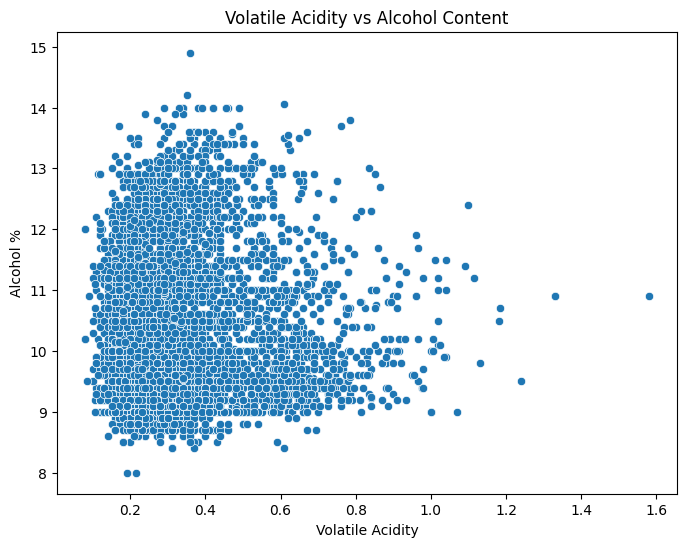

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x["volatile_acidity"], y=x["alcohol"])
plt.title("Volatile Acidity vs Alcohol Content")
plt.xlabel("Volatile Acidity")
plt.ylabel("Alcohol %")
plt.show()

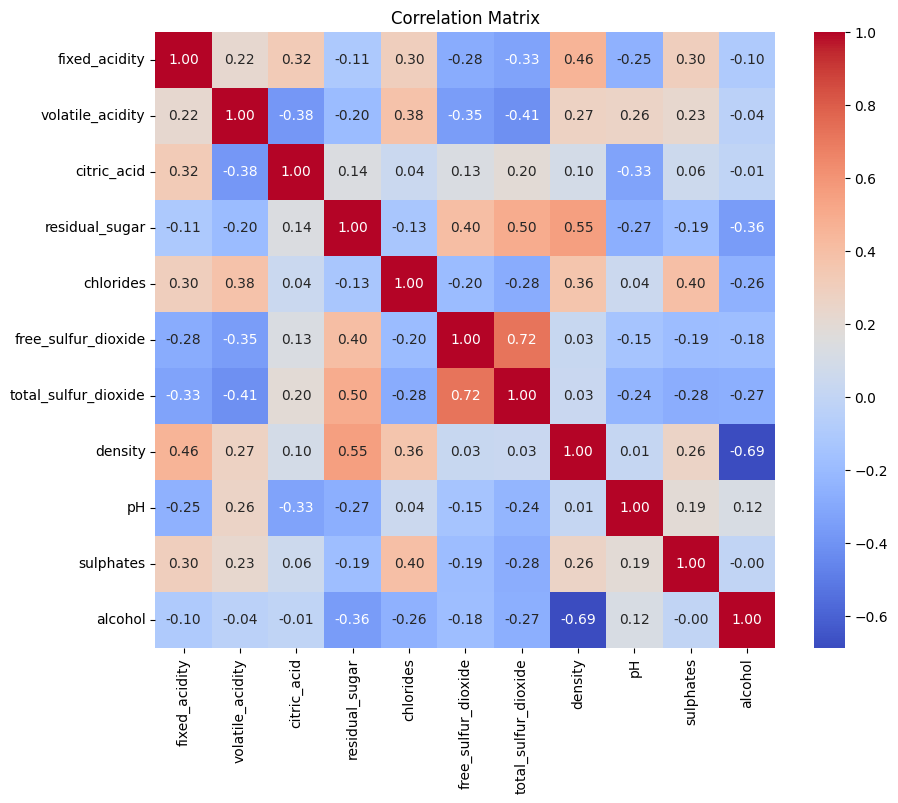

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(x.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

lets merge x and y and group by quality

In [ ]:
df = x.copy()
df["quality"] = y
df.groupby("quality").mean()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.853333,0.517000,0.281000,5.140000,0.077033,39.216667,122.033333,0.995744,3.257667,0.506333,10.215000
4,7.288889,0.457963,0.272315,4.153704,0.060056,20.636574,103.432870,0.994833,3.231620,0.505648,10.180093
5,7.326801,0.389614,0.307722,5.804116,0.064666,30.237371,120.839102,0.995849,3.212189,0.526403,9.837783
6,7.177257,0.313863,0.323583,5.549753,0.054157,31.165021,115.410790,0.994558,3.217726,0.532549,10.587553
7,7.128962,0.288800,0.334764,4.731696,0.045272,30.422150,108.498610,0.993126,3.228072,0.547025,11.386006
8,6.835233,0.291010,0.332539,5.382902,0.041124,34.533679,117.518135,0.992514,3.223212,0.512487,11.678756
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


Ok We can formulate few hypothesis
What Qualities Make a Wine "Good"?
Wine snobs look at several key factors, and we can analyze some of these in our dataset

Acidity (pH)
Wines need some acidity to be fresh and crisp.
Low pH (higher acidity) = Better aging potential.
Ideal pH for quality wines: 3.0 - 3.5 (lower for whites, higher for reds).
*   Good: 3.0 - 3.5:
*   Too low (very acidic): Below 2.9
*   Too high (flat taste): Above 4.0

In [ ]:
df["pH"].describe()

,pH
count,6497.000000
mean,3.218501
std,0.160787
min,2.720000
25%,3.110000
50%,3.210000
75%,3.320000
max,4.010000


Tannins & Bitterness (Sulphates)
Tannins give a wine structure & complexity (important for reds).
Sulphates help preserve the wine but too much = bitter taste.
Balanced tannins & sulphates = smoother, richer wine
Too high = Bitter, chemical taste

In [ ]:
df["sulphates"].describe()

,sulphates
count,6497.000000
mean,0.531268
std,0.148806
min,0.220000
25%,0.430000
50%,0.510000
75%,0.600000
max,2.000000


Alcohol Content
Higher alcohol (13-15%) often means better extraction of flavors, but too high = overpowering.
Ideal range:
Reds: 12-14.5%
Whites: 10-13%
Balanced alcohol = Full-bodied wine
Too high (>15%) = Overwhelming, burns
Too low (<9%) = Watery, weak

In [ ]:
df["alcohol"].describe()

,alcohol
count,6497.000000
mean,10.491801
std,1.192712
min,8.000000
25%,9.500000
50%,10.300000
75%,11.300000
max,14.900000


Residual Sugar (Sweetness)
Dry wines = Less sugar, more crispness.
High-quality wines are often drier, unless they are dessert wines.
Check sugar levels:

Good: 0.1 - 3 g/L for dry wines
Good: 10-50 g/L for sweet dessert wines
Bad: Too high (unless intentional)

In [ ]:
df["residual_sugar"].describe()

,residual_sugar
count,6497.000000
mean,5.443235
std,4.757804
min,0.600000
25%,1.800000
50%,3.000000
75%,8.100000
max,65.800000


Body & Complexity (Density)
A full-bodied wine has higher density (more richness).
Too much density = cloying (feels heavy).:

In [ ]:
df["density"].describe()

,density
count,6497.000000
mean,0.994697
std,0.002999
min,0.987110
25%,0.992340
50%,0.994890
75%,0.996990
max,1.038980


Lets Discuss one of the hypothesis formally

Let's test if higher alcohol content is associated with higher wine quality.

Null Hypothesis (H₀): The mean alcohol content is the same for high-quality and low-quality wines.
Alternative Hypothesis (H₁): High-quality wines have a significantly higher mean alcohol content.


Split the Data in to High and Low Alchohol groupes

In [ ]:
high_quality = df[df["quality"] >= 7]["alcohol"]
low_quality = df[df["quality"] <= 5]["alcohol"]

We can use an independent t-test (since the two groups are independent) to compare the mean alcohol content.


In [ ]:
t_stat, p_value = stats.ttest_ind(high_quality, low_quality, equal_var=False)

print(f"T-Statistic: {t_stat:.3f}")
print(f"P-Value: {p_value:.5f}")

T-Statistic: 40.901
P-Value: 0.00000


If p-value < 0.05, we reject H₀, meaning alcohol content is significantly higher in high-quality wines.
Looks like we can the reject the H₀.

As a next step you could look at all the other significant colunms and try to establish connections with a target column

The wine dataset appears to be of good quality, with clear and consistent features such as alcohol content, acidity, and sulfur levels, which are crucial for wine quality evaluation. There are a few outliers present, but they do not seem extreme or inconsistent with the rest of the data, so they have been retained for further analysis. The data provides a solid foundation for analyzing the factors influencing wine quality. However, if more detailed insights are required, additional data, such as regional variations, wine age, or sensory evaluations from expert panels, could further enrich the analysis and lead to more nuanced conclusions.